In [5]:
import json
from pathlib import Path

from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
from tabulate import tabulate

from contact_graspnet.utils.misc import get_root_dir
from contact_graspnet.utils.visualization import mlab_pose_vis
from contact_graspnet.datatypes import GraspCam

In [ ]:
### plot all original images ###

ycb_path = Path.home() / "Documents" / "ycb_sim_data_1"
obj_names = sorted([p.name for p in ycb_path.iterdir()])

for i, name in enumerate(obj_names):
    print(f"{i}: {name}")

    img = np.load(ycb_path / name)["rgb_img"]

    plt.imshow(img)

    plt.show()

In [ ]:
### show the mlab visualization of all results of a certain result set ###

result_path = get_root_dir() / "data" / "results" / "ycb_1_resize"
result_names = sorted([p.name for p in result_path.iterdir() if p.is_dir()])

for result_name in result_names:
    print(result_name)

    mlab_pose_vis(
        np.load(result_path / result_name / "full_pc.npy"),
        [
            GraspCam(**d)
            for d in json.load(open(result_path / result_name / "data.json"))[
                "grasps_cam"
            ]
        ],
        np.load(result_path / result_name / "full_pc_colors.npy"),
    )


ycb1_resize
samples with no grasps: 7


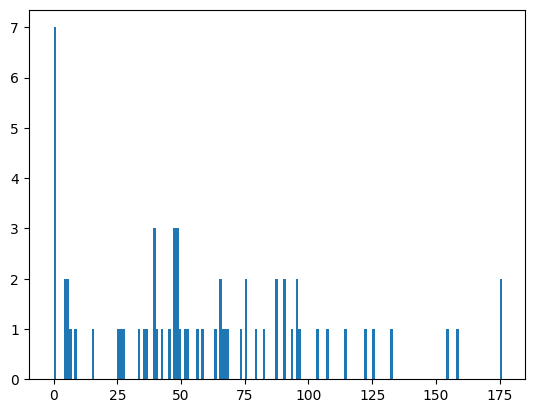

ycb2_resize
samples with no grasps: 22


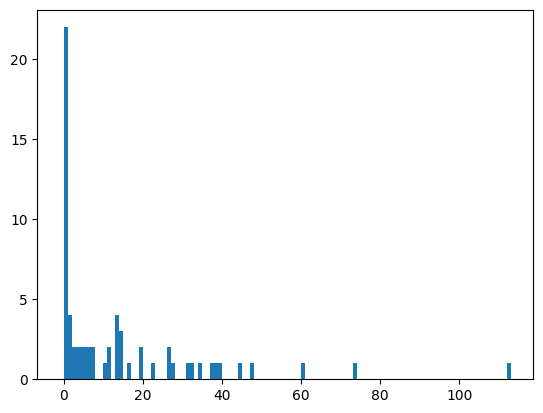

ycb3_resize
samples with no grasps: 23


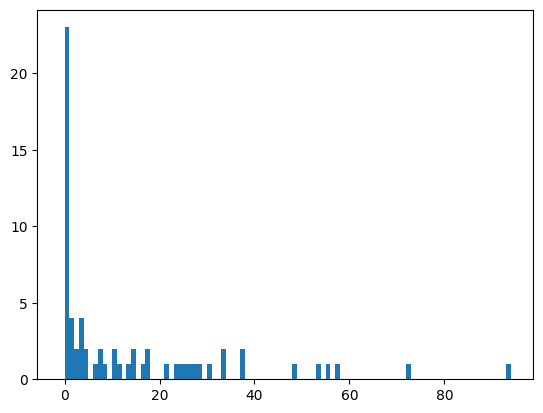

ycb4_resize
samples with no grasps: 31


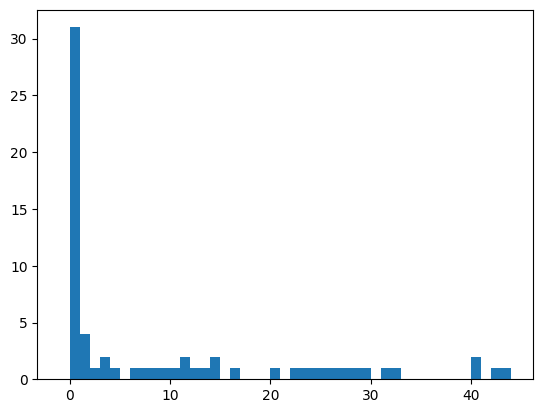

ycb1_no_resize
samples with no grasps: 11


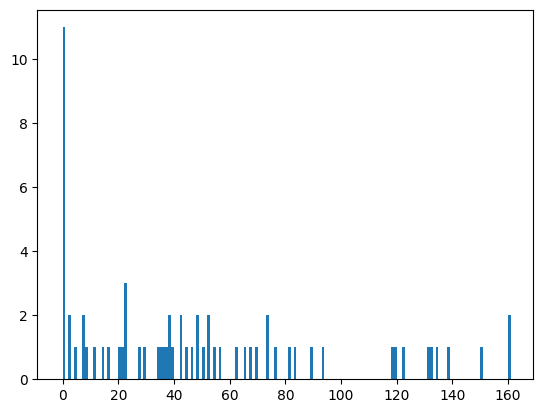

ycb2_no_resize
samples with no grasps: 20


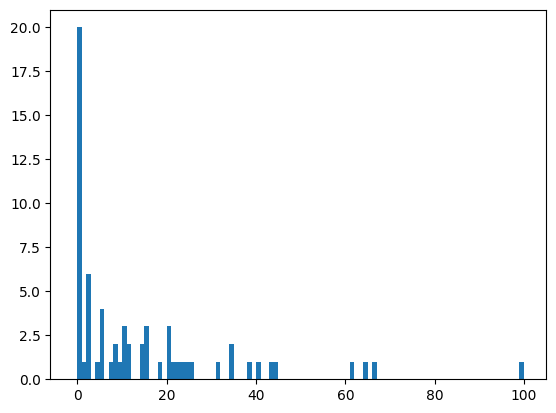

ycb3_no_resize
samples with no grasps: 20


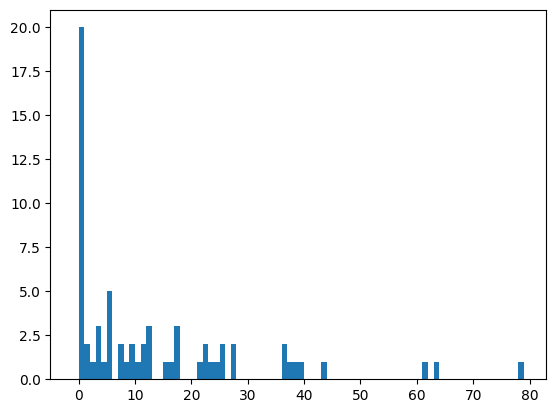

ycb4_no_resize
samples with no grasps: 23


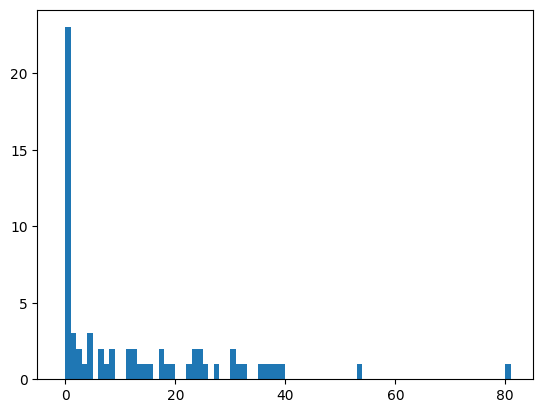

names                        ycb1_resize    ycb2_resize    ycb3_resize    ycb4_resize    ycb1_no_resize    ycb2_no_resize    ycb3_no_resize    ycb4_no_resize
-------------------------  -------------  -------------  -------------  -------------  ----------------  ----------------  ----------------  ----------------
001_master_chef_can                   87              0              3              0                81                 0                 1                 1
002_cracker_box                       93             47             55             31                42                64                43                53
003_sugar_box                         96             60             33              6                54                61                39                30
004_tomato_soup_can                  158             19             57             40               161                31                63                31
005_mustard_bottle                    58            

In [6]:
### histograms of the number of grasps per sampel for each ycb result set ###

ycb_result_paths = [
    get_root_dir() / "data" / "results" / "ycb1_resize",
    get_root_dir() / "data" / "results" / "ycb2_resize",
    get_root_dir() / "data" / "results" / "ycb3_resize",
    get_root_dir() / "data" / "results" / "ycb4_resize",

    get_root_dir() / "data" / "results" / "ycb1_no_resize",
    get_root_dir() / "data" / "results" / "ycb2_no_resize",
    get_root_dir() / "data" / "results" / "ycb3_no_resize",
    get_root_dir() / "data" / "results" / "ycb4_no_resize",
]
ycb_result_names = sorted([p.name for p in ycb_result_paths[0].iterdir() if p.is_dir()]) 

n_grasps_table = {}
n_grasps_table["names"] = ycb_result_names + ["total"]

for result_path in ycb_result_paths:
    n_grasps = []
    n_grasps_table[result_path.name] = []

    for result_name in ycb_result_names:
        with open(result_path / result_name / "data.json") as f:
            data = json.load(f)

        n = len(data["grasps_cam"])
        
        n_grasps.append(n)
        n_grasps_table[result_path.name].append(n)

    n_grasps = np.array(n_grasps)
    n_grasps_table[result_path.name].append(sum(n_grasps))

    plt.hist(n_grasps, bins=np.arange(-1, max(n_grasps)+1))
    print(result_path.name)
    print(f"samples with no grasps: {np.sum(n_grasps == 0)}")
    plt.show()

print(tabulate(n_grasps_table, headers="keys"))

001_master_chef_can
number of grasps: 0


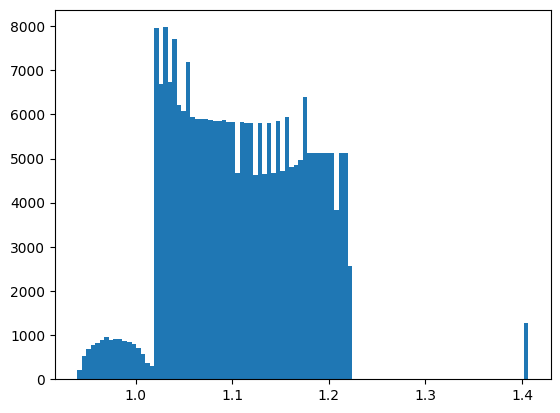

008_gelatin_box
number of grasps: 0


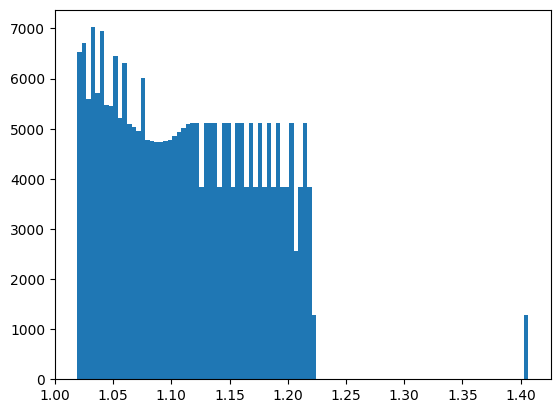

015_pear
number of grasps: 0


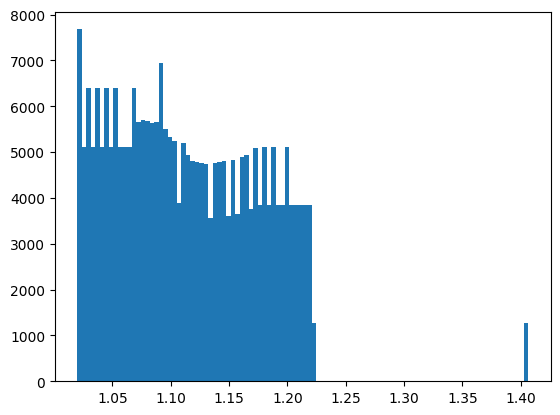

018_pitcher_base
number of grasps: 0


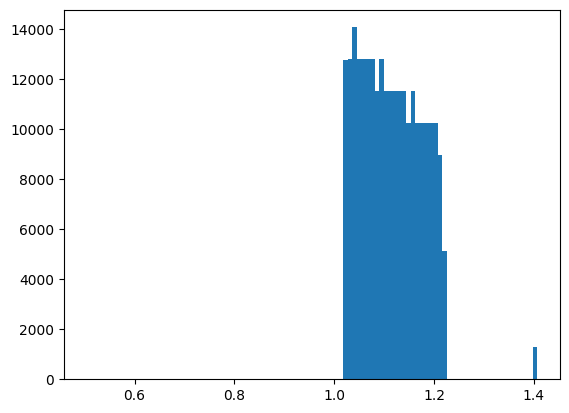

023_sponge
number of grasps: 0


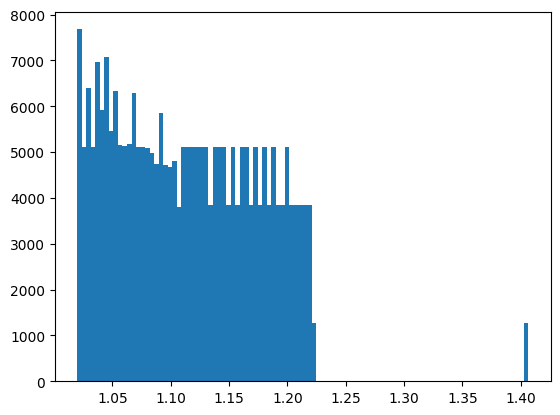

027_spoon
number of grasps: 0


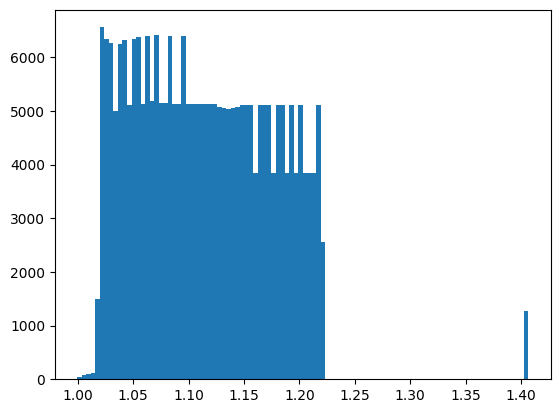

031_wood_block
number of grasps: 0


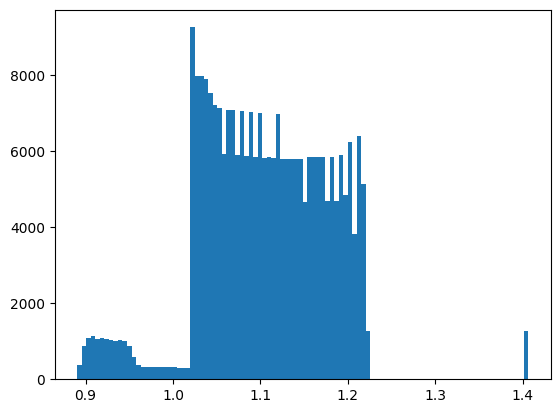

032_scissors
number of grasps: 0


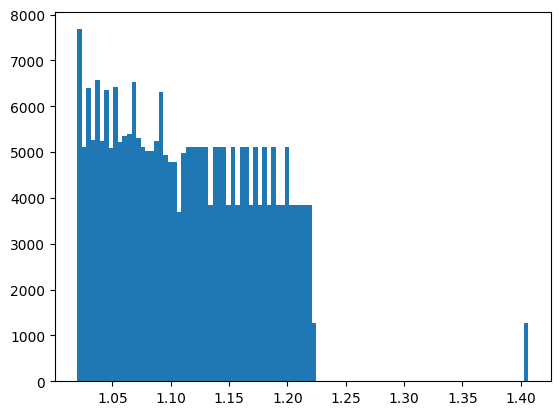

034_large_marker
number of grasps: 0


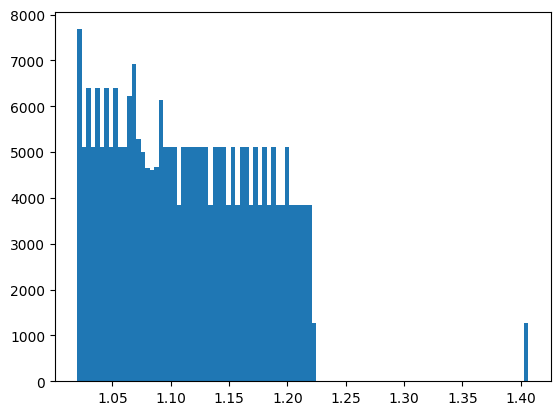

036_adjustable_wrench
number of grasps: 0


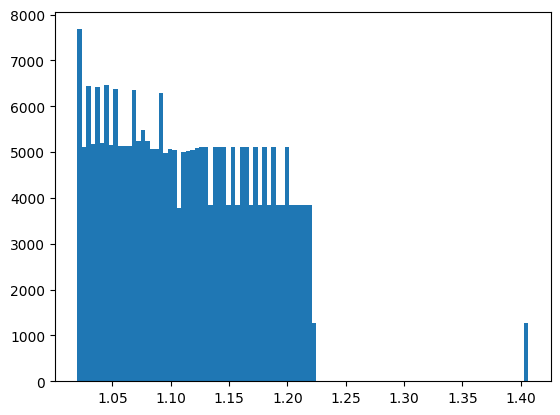

037_phillips_screwdriver
number of grasps: 0


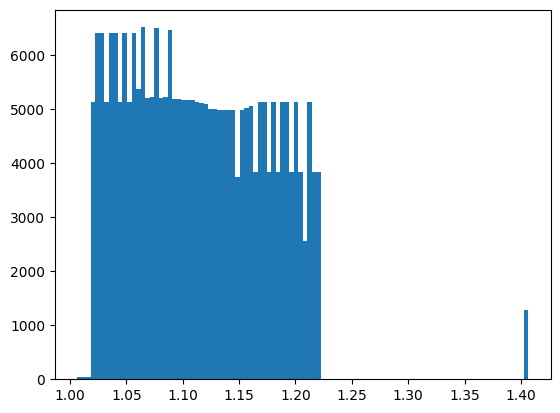

038_flat_screwdriver
number of grasps: 0


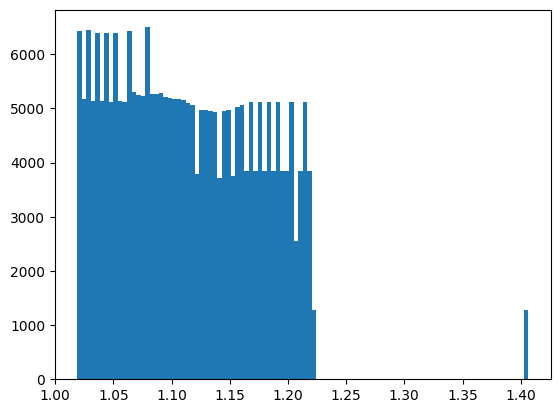

041_medium_clamp
number of grasps: 0


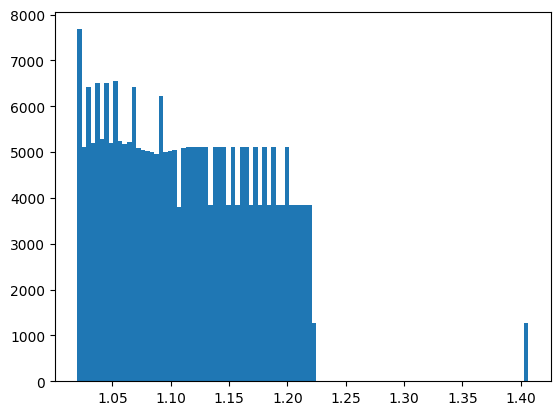

044_mini_soccer_ball
number of grasps: 0


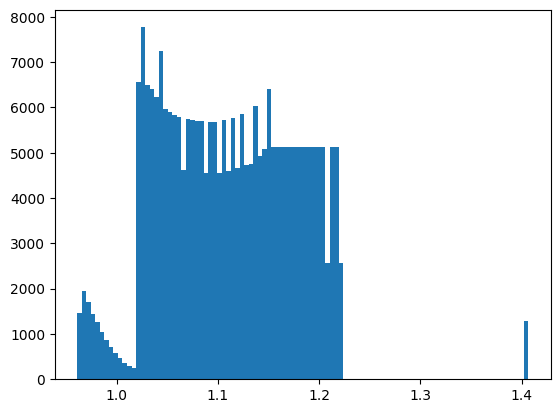

045_softball
number of grasps: 0


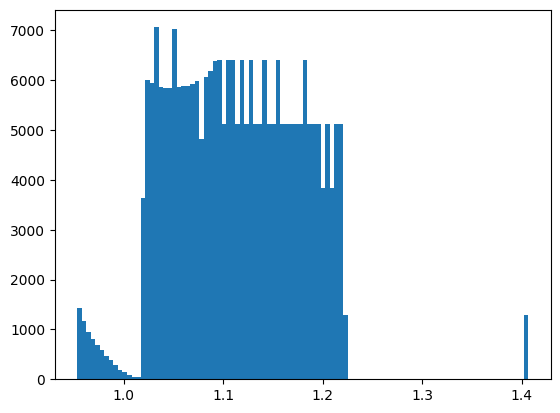

046_baseball
number of grasps: 0


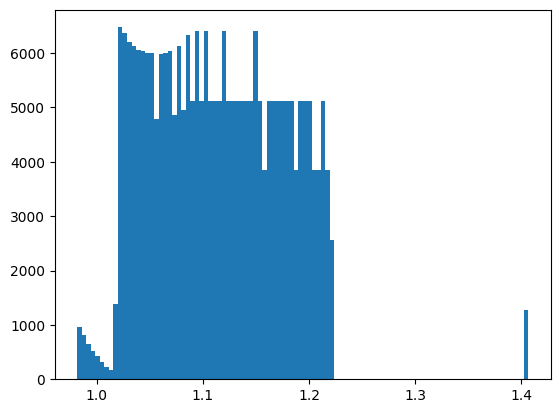

052_dice
number of grasps: 0


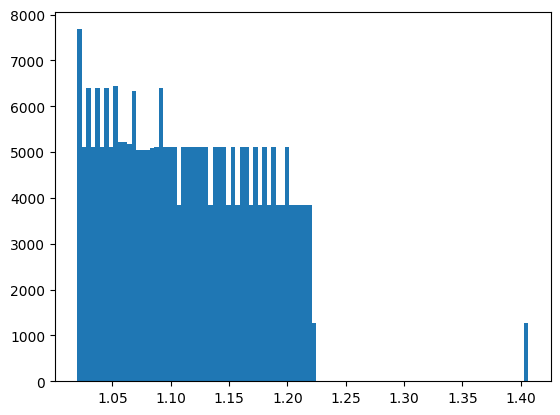

054_b_marbles
number of grasps: 0


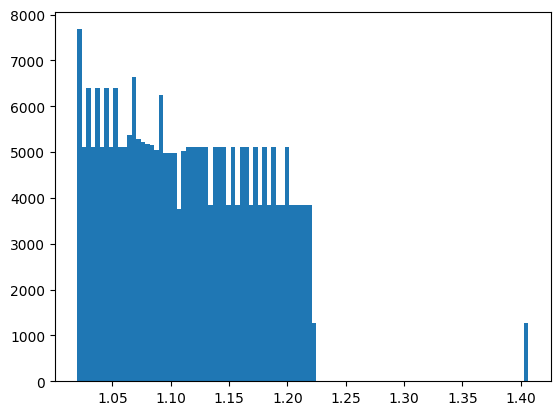

072_e_toy_airplane
number of grasps: 0


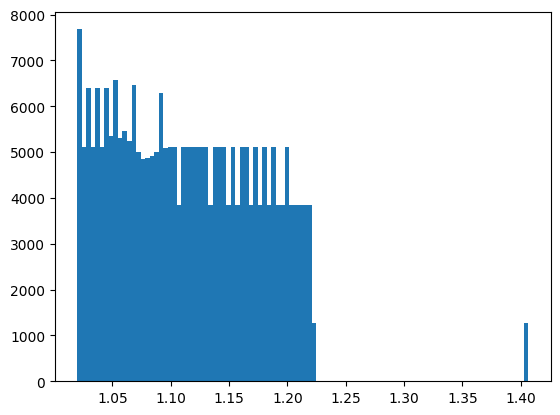

075_a_lego_duplo
number of grasps: 0


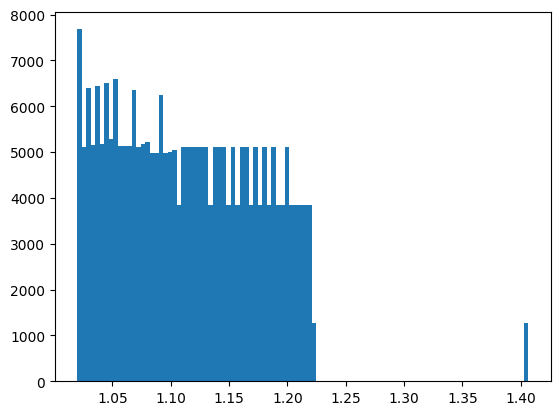

077_c_lego_duplo
number of grasps: 0


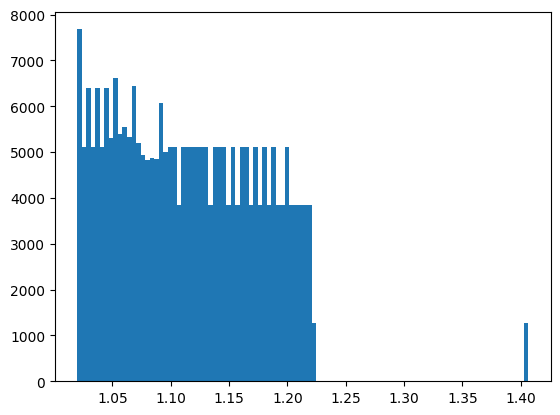

080_f_lego_duplo
number of grasps: 0


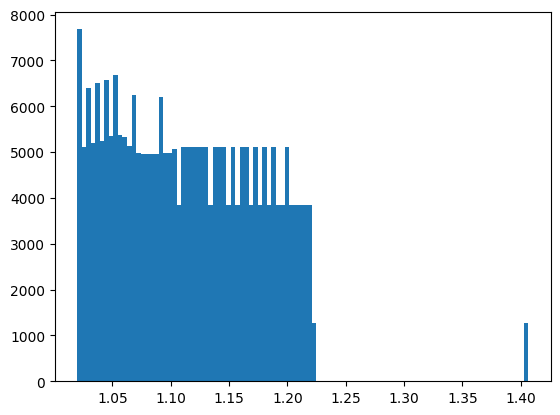

006_tuna_fish_can
number of grasps: 1


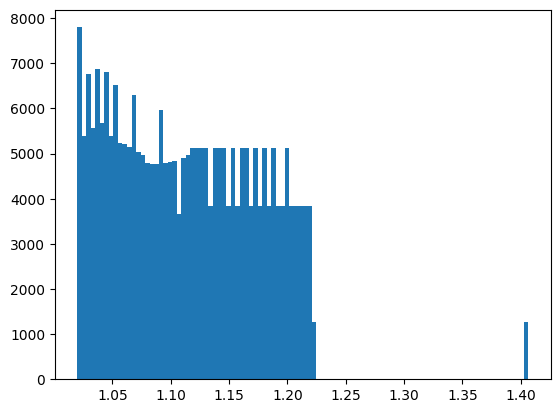

007_pudding_box
number of grasps: 1


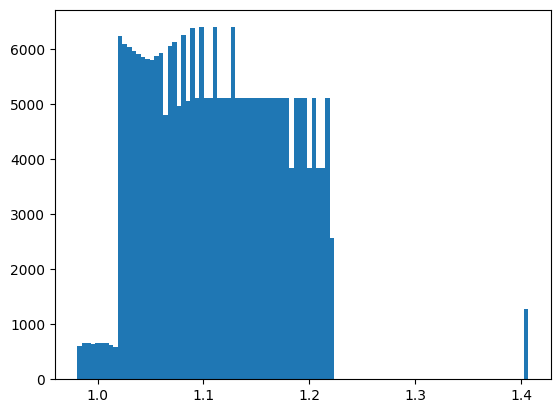

071_d_toy_airplane
number of grasps: 1


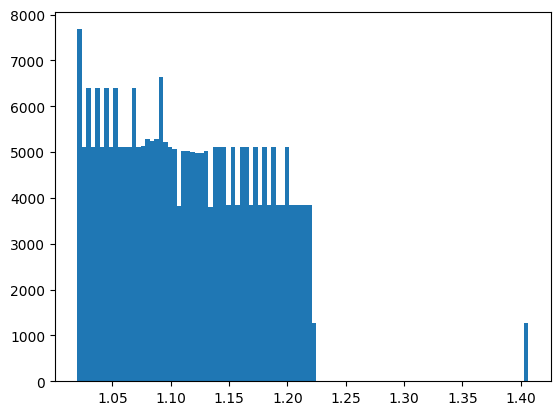

079_e_lego_duplo
number of grasps: 1


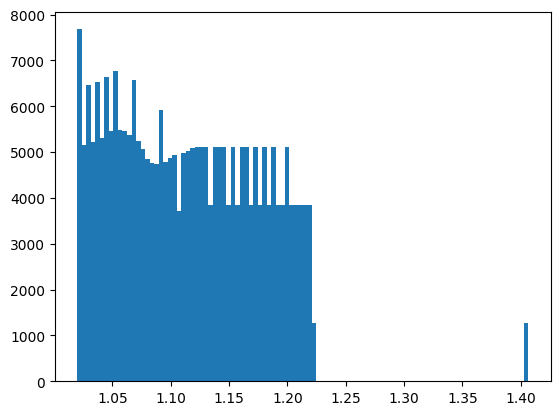

028_knife
number of grasps: 2


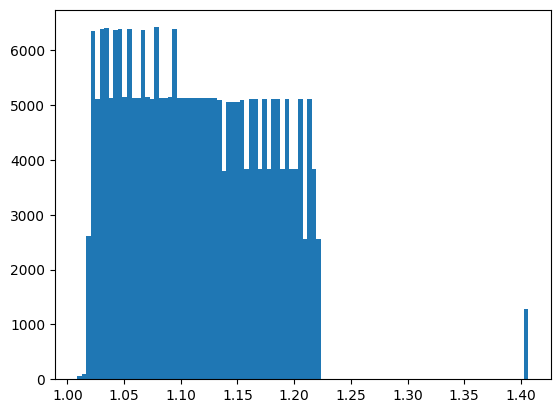

066_b_colored_wood_blocks
number of grasps: 2


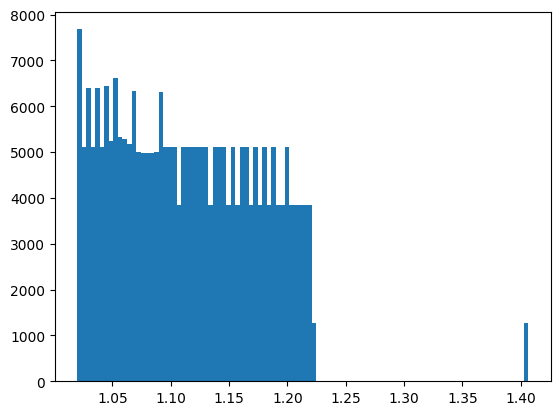

050_chain
number of grasps: 3


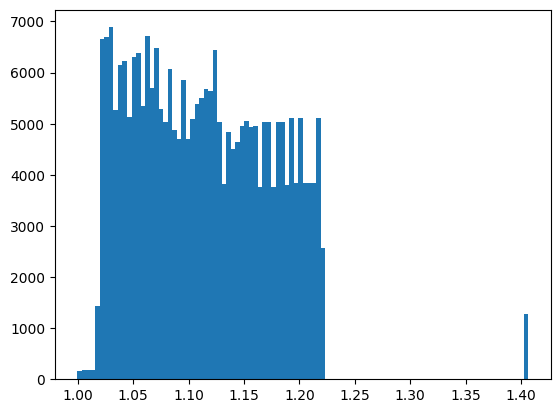

078_d_lego_duplo
number of grasps: 3


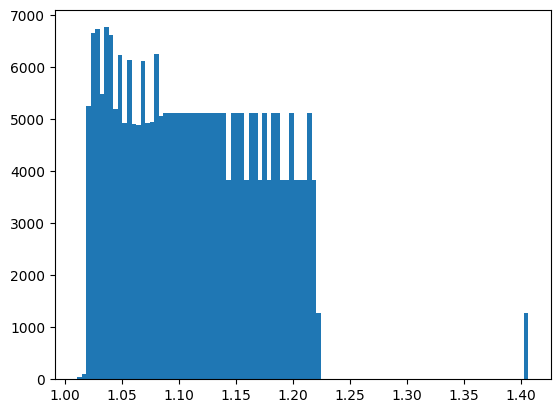

029_spatula
number of grasps: 4


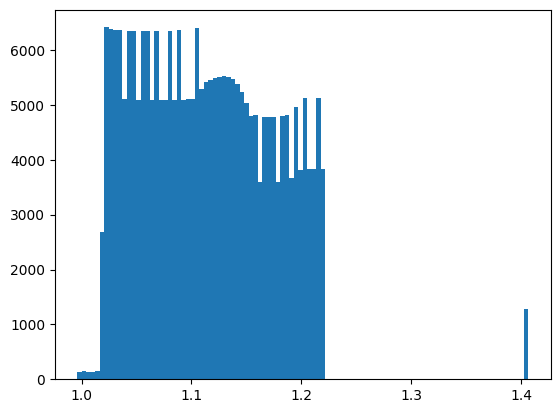

049_golf_ball
number of grasps: 4


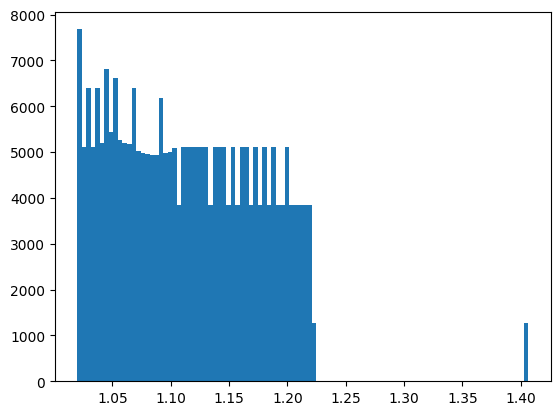

010_banana
number of grasps: 5


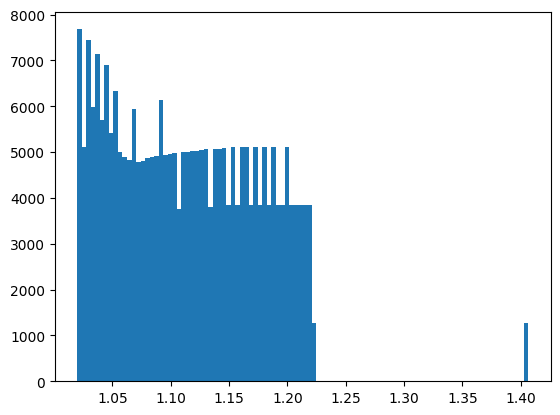

012_apple
number of grasps: 5


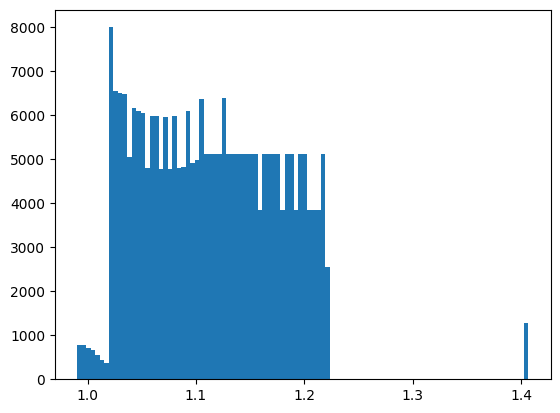

069_b_toy_airplane
number of grasps: 6


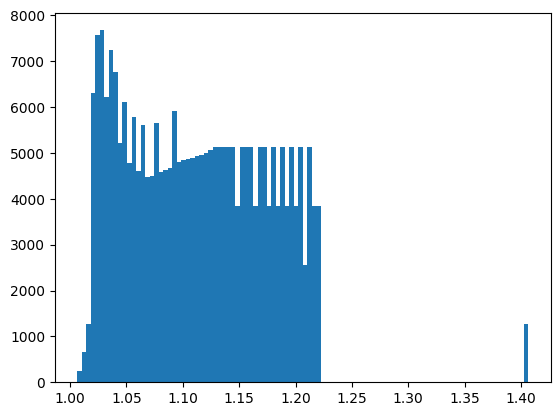

076_b_lego_duplo
number of grasps: 6


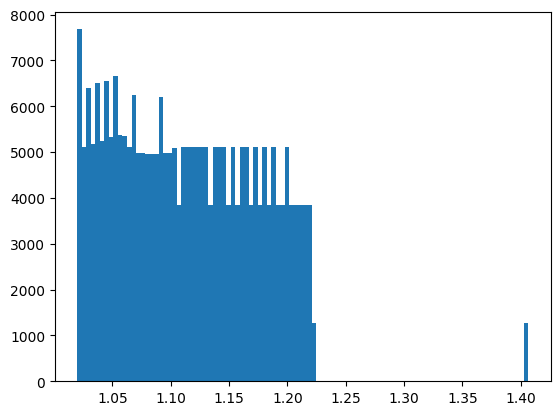

017_plum
number of grasps: 7


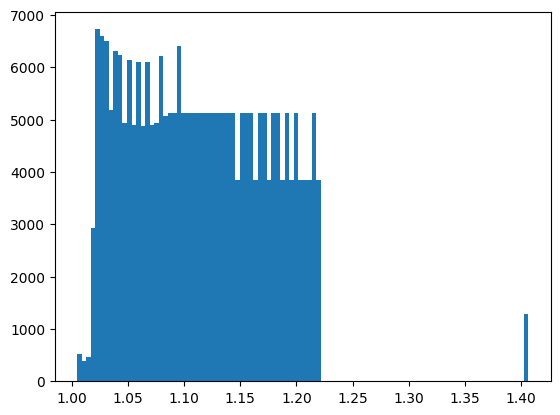

048_racquetball
number of grasps: 7


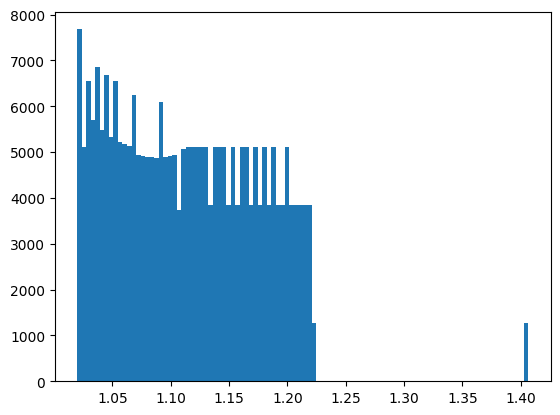

022_mug
number of grasps: 10


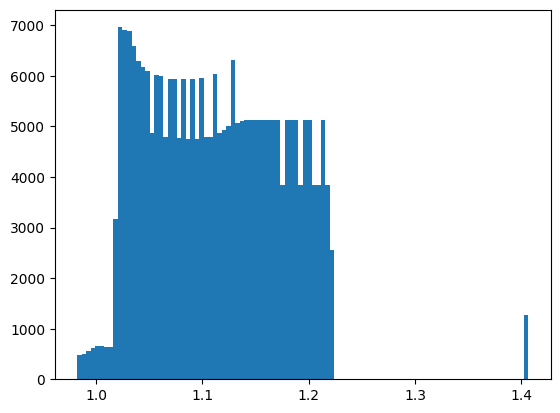

016_orange
number of grasps: 11


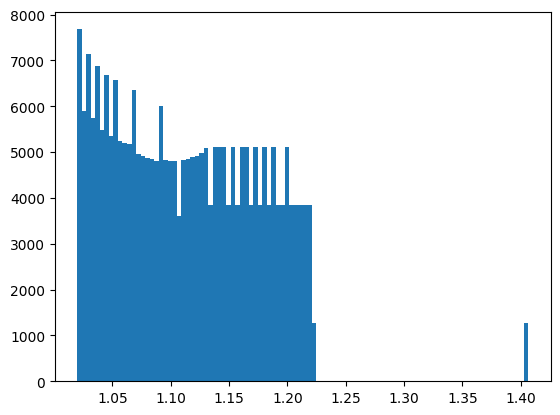

047_tennis_ball
number of grasps: 11


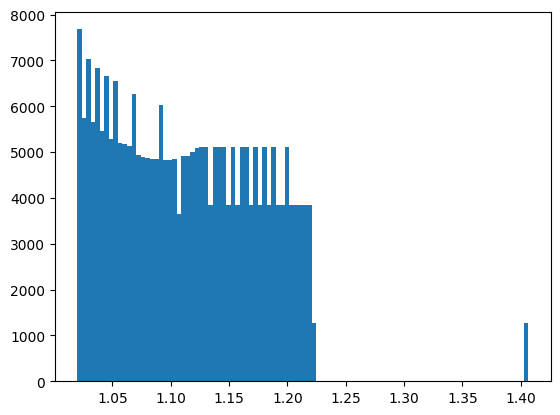

011_strawberry
number of grasps: 13


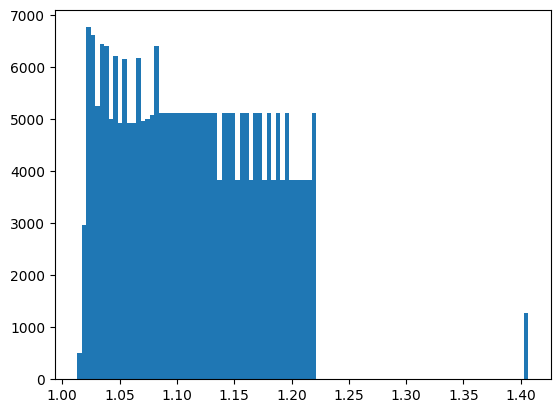

014_peach
number of grasps: 13


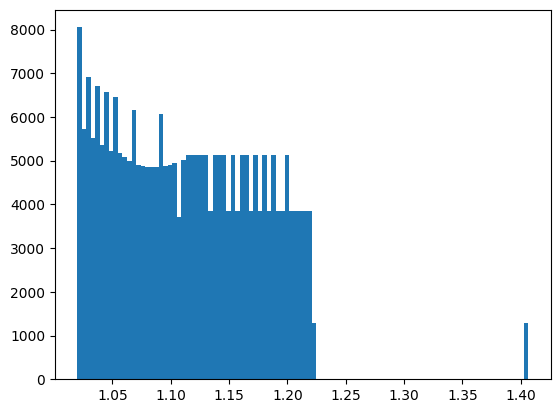

062_h_cups
number of grasps: 13


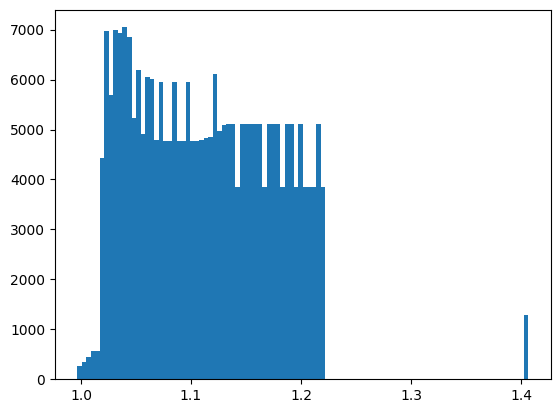

064_j_cups
number of grasps: 13


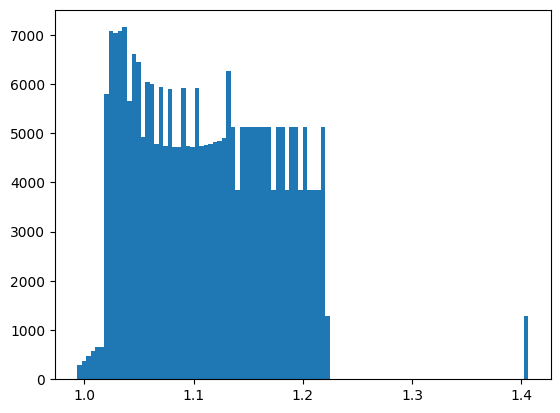

053_a_marbles
number of grasps: 14


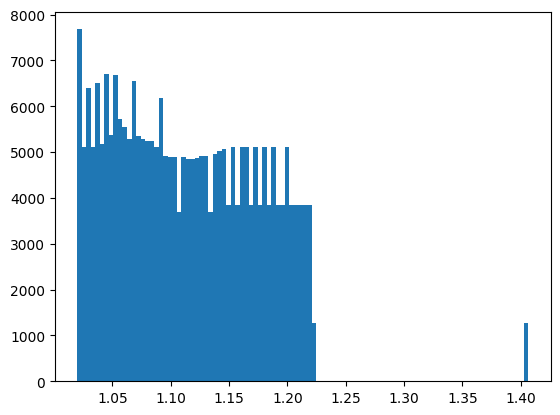

063_i_cups
number of grasps: 14


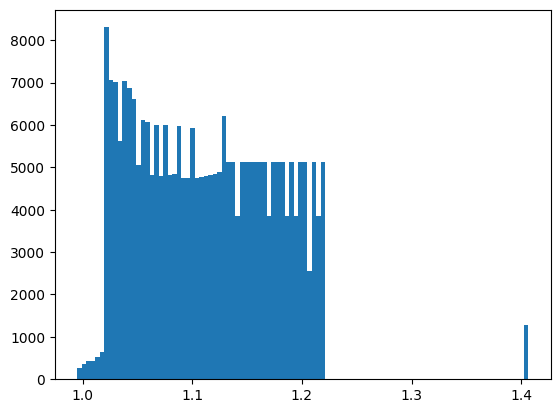

067_nine_hole_peg_test
number of grasps: 14


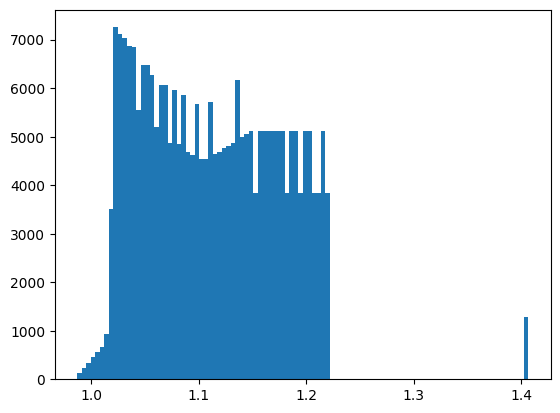

055_a_cups
number of grasps: 16


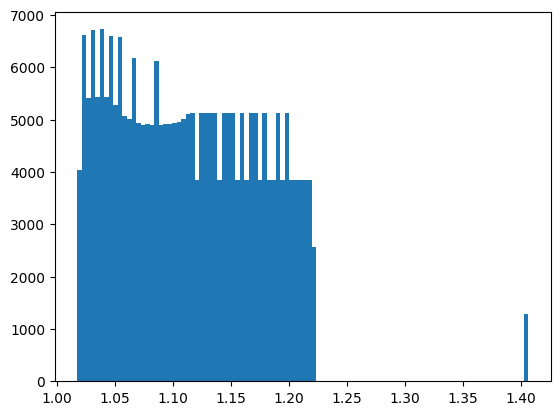

004_tomato_soup_can
number of grasps: 19


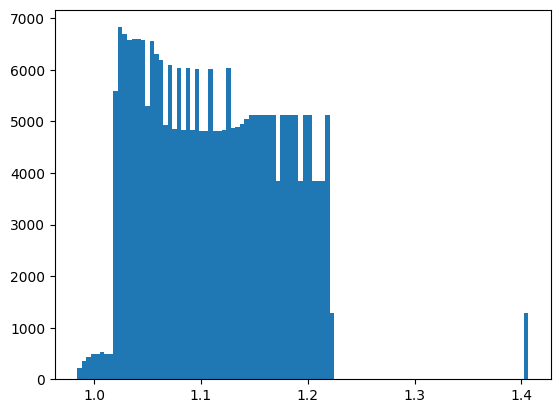

013_lemon
number of grasps: 19


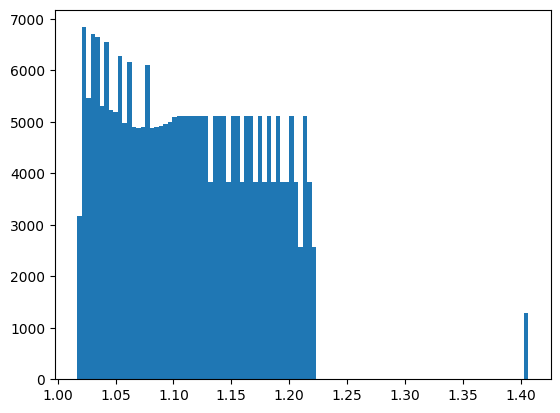

051_foam_brick
number of grasps: 22


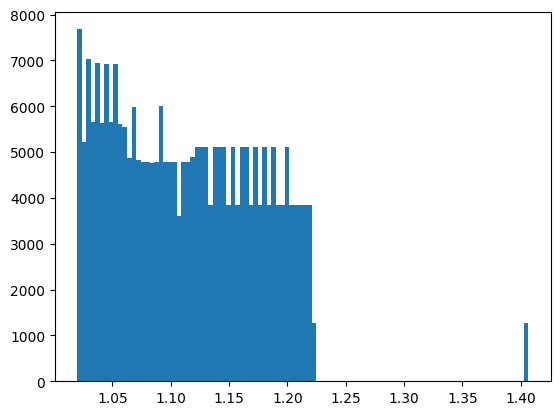

061_g_cups
number of grasps: 26


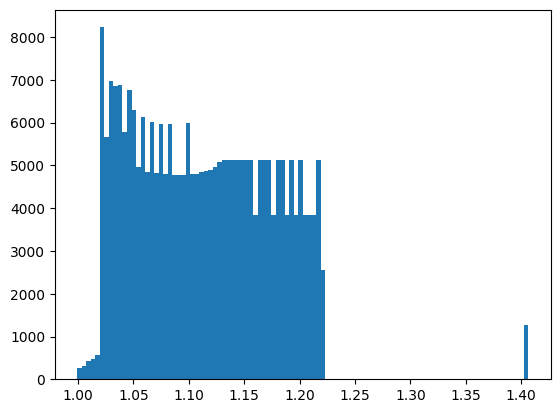

070_c_toy_airplane
number of grasps: 26


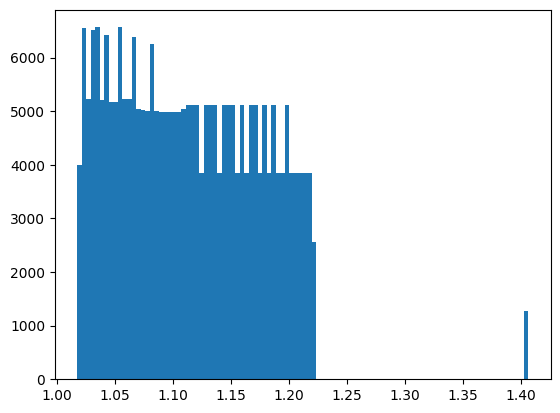

030_power_drill
number of grasps: 27


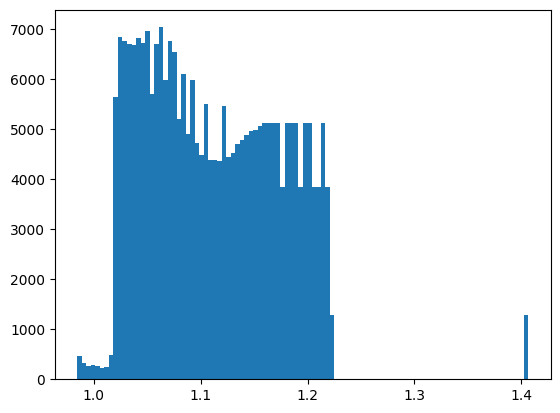

089_rubiks_cube
number of grasps: 31


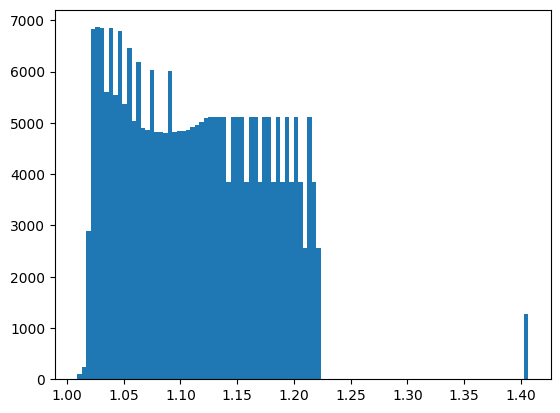

009_potted_meat_can
number of grasps: 32


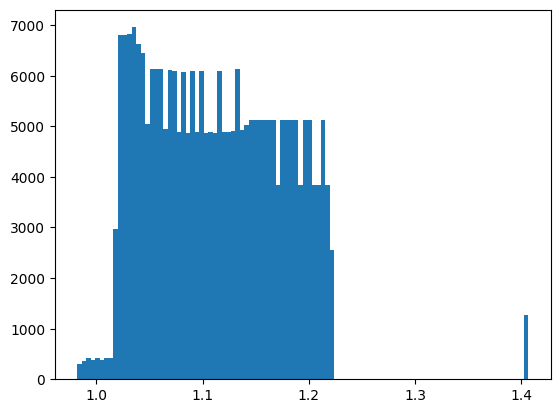

043_extra_large_clamp
number of grasps: 34


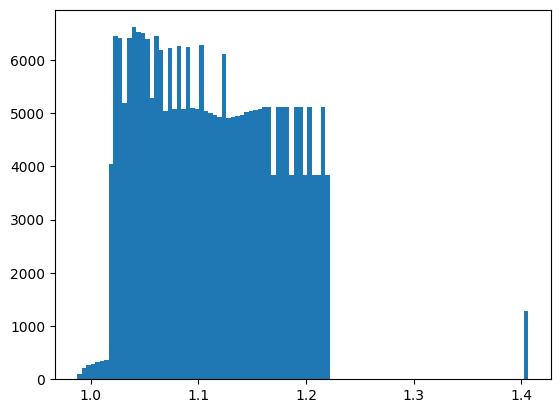

005_mustard_bottle
number of grasps: 37


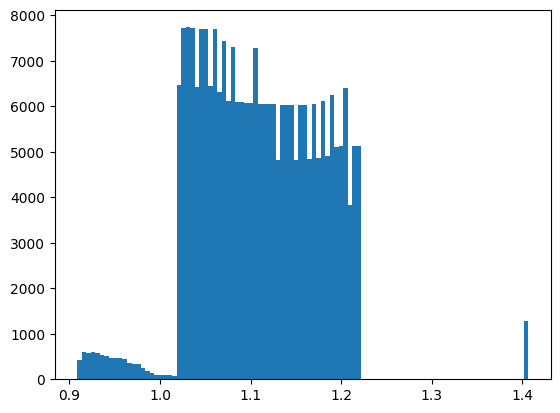

060_f_cups
number of grasps: 38


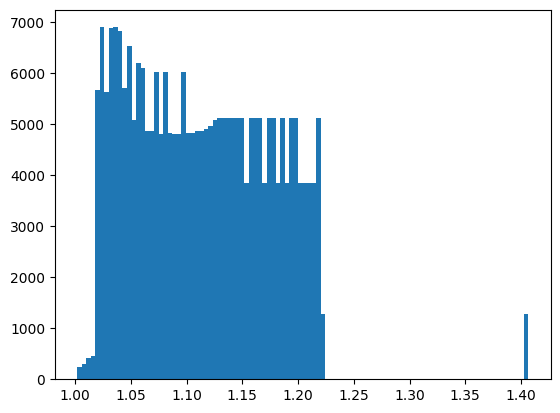

081_g_lego_duplo
number of grasps: 39


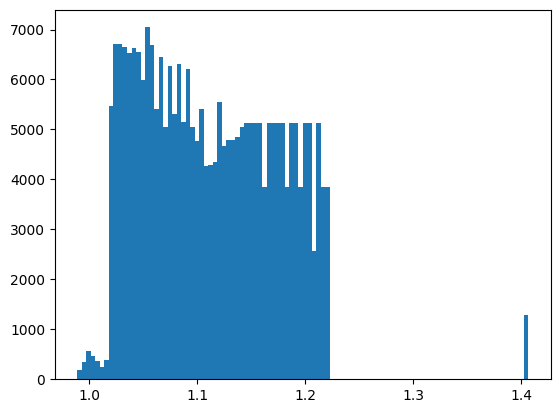

065_a_colored_wood_blocks
number of grasps: 44


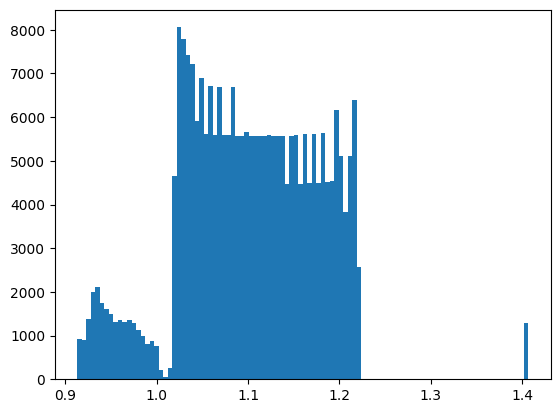

002_cracker_box
number of grasps: 47


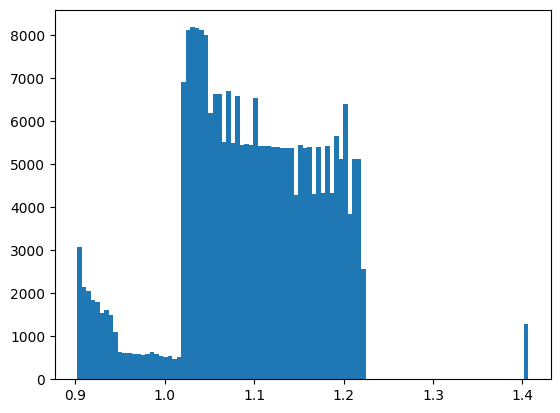

003_sugar_box
number of grasps: 60


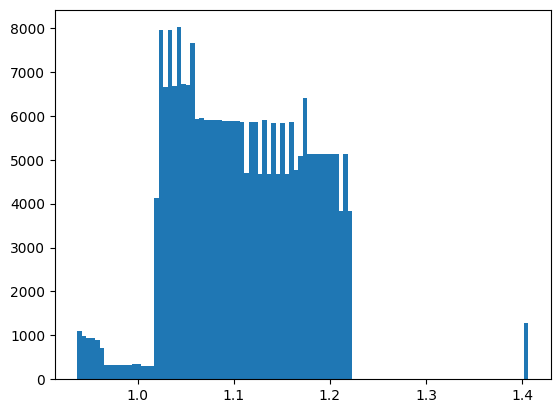

068_a_toy_airplane
number of grasps: 73


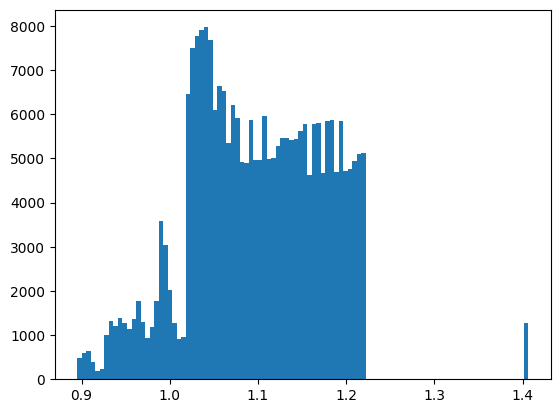

057_c_cups
number of grasps: 113


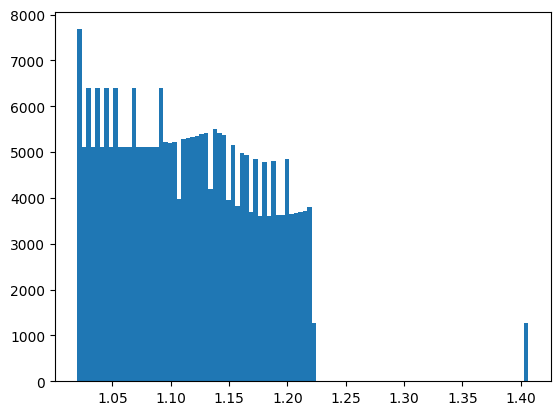

In [4]:
### for a given result set show the z distribution and the number of grasps per sample ###

result_path = get_root_dir() / "data" / "results" / "ycb2_resize"
result_names = sorted([p.name for p in result_path.iterdir() if p.is_dir()])

results = []
for result_name in result_names:
    with open(result_path / result_name / "data.json") as f:
        data = json.load(f)

    n = len(data["grasps_cam"])
    z = np.load(result_path / result_name / "full_pc.npy")[:, 2]
    
    results.append((result_name, n, z))

results = sorted(results, key=lambda x: x[1])

for result_name, n, z in results:
    print(result_name)
    print(f"number of grasps: {n}")
    plt.hist(z, bins=100)
    plt.show()